**MTD - Mock (PC1) Exam: Multiple regression and factorial ANOVA in salary analysis**  
**Duration:** 2 hours  

**Allowed tools:** Python, Pandas, Statsmodels, Scikit-Learn, Plotly, Seaborn, Your own notes.  
**Strictly allowed only when necessary:** Google Translate, Stack Overflow.  
**Prohibited tools:** Any AI-based tools (ChatGPT, Copilot, Bard, Claude, etc.) 

**Instructions:** Download and load the provided dataset into Python. Answer each question using code and provide a brief interpretation of the results.  



**Part 1: Exploratory Analysis**  



1. **Data Loading and Exploration:**  
   - Load the dataset into a Pandas DataFrame.  
   - Display the first 5 rows and a statistical summary of the numerical variables.  



In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Dataset_de_Salarios.csv')
display(df.head(5))

,Salario,Experiencia,Horas_Trabajadas,Edad,Educacion,Genero,Departamento
0,106428.688101,38,57,57,Maestría,Mujer,RRHH
1,122647.975547,28,56,41,Licenciatura,Mujer,TI
2,67236.095324,14,35,22,Secundaria,Mujer,TI
3,50647.412537,7,45,29,Secundaria,Hombre,Ventas
4,82785.665356,20,58,37,Maestría,Hombre,RRHH


2. **Salary Distribution:**  
   - Generate a histogram of the salary variable.  
   - Does the distribution appear normal? What observations can you make?  



In [10]:
import matplotlib.pyplot as plt

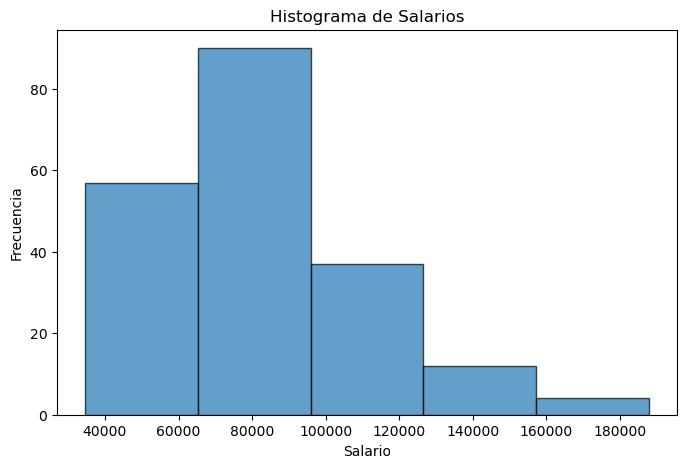

In [11]:
plt.figure(figsize=(8,5))
plt.hist(df["Salario"], bins=5, edgecolor="black", alpha=0.7)
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.title("Histograma de Salarios")
plt.show()

Here we can see that the most salary is 80000, is like the normal salary, then the 180000 appears less, this has sense because only a little group of people earns that money.


3. **Correlation Between Variables:**  
   - Compute and display the correlation matrix for all numerical variables.  
   - Which variables seem most correlated with salary?  



In [12]:
import seaborn as sns

C:\Users\Hugo\AppData\Local\Temp\ipykernel_21720\2374810870.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


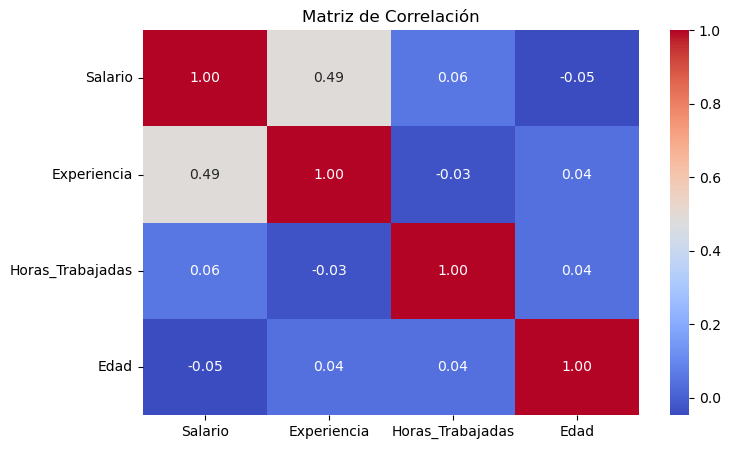

                   Salario  Experiencia  Horas_Trabajadas      Edad
Salario           1.000000     0.487730          0.058550 -0.047607
Experiencia       0.487730     1.000000         -0.029053  0.041478
Horas_Trabajadas  0.058550    -0.029053          1.000000  0.040515
Edad             -0.047607     0.041478          0.040515  1.000000


In [14]:
# Compute correlation matrix
corr_matrix = df.corr()

# Display correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Print correlation matrix
print(corr_matrix)

The variable that most influences salary is experience (0.4877), although the relationship is moderate rather than strong.

Hours worked and age do not appear to have a significant correlation with salary.

The weak correlation between experience and age is somewhat unusual, as older individuals typically have more work experience.

To better understand salary determinants, it would be useful to include additional variables such as education level, job position, or industry sector.

**Part 2: Multiple Regression**  



4. **Fitting a Multiple Regression Model (Only Numerical Variables):**  
   - Fit a regression model where **salary** is the dependent variable and only **experience, hours worked, and age** are predictors.  
   - Display the model coefficients.  



In [4]:
import statsmodels.api as sm

In [5]:
# Definir variables independientes (experience, hours worked age) y dependiente (salary)
X = df[['Experiencia', 'Horas_Trabajadas', 'Edad']]
y = df['Salario']

In [6]:
# Agregar constante para la regresión
X = sm.add_constant(X)

In [7]:
# Ajustar modelo de regresión lineal múltiple
modelo = sm.OLS(y, X).fit()

In [1]:
# Mostrar resumen del modelo
print(modelo.summary())

NameError: name 'modelo' is not defined

5. **Interpreting Coefficients:**  
   - What is the effect of **experience** on salary?  
   - How does each additional year of experience impact salary?  



Here we can see that the experience coefficient positive, so for a higher experience we hace a higher salary.

Each year affects 1122 at the salary, this is the coefficient of experience.

6. **Model Evaluation:**  
   - Report the **R²** value of the model.  
   - Does the model explain salary variability well?  



The R2 value is 0.248, this says to us that only the 24.8% of the salary variability is explain by the model, the other percentage of the variation in salary is due to other factors

7. **Multicollinearity Check:**  
   - Calculate the **VIF (Variance Inflation Factor)** for each numerical variable.  
   - Are there any multicollinearity issues?  



In [15]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
# Seleccionar solo las variables numéricas
X = df.select_dtypes(include=[np.number])  

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los valores de VIF
print(vif_data)

           Variable        VIF
0           Salario  11.803179
1       Experiencia   4.851449
2  Horas_Trabajadas  13.546152
3              Edad  10.500652


Salary, age and hours worked present multicollinearity issues, because vif > 5, then experience doesnt present problems of multicollinearity

**Part 3: ANOVA and Group Comparisons**  



8. **ANOVA for Salary Differences by Education Level:**  
   - Perform a one-way ANOVA to analyze if education level has a significant impact on salary.  
   - Report the **p-value** and your conclusion.  



In [25]:
import scipy.stats as stats

In [26]:
# Realizar el ANOVA de un solo factor (Salario vs Nivel educativo)
anova_result = stats.f_oneway(
    df[df['Educacion'] == 'Maestría']['Salario'],
    df[df['Educacion'] == 'Licenciatura']['Salario'],
    df[df['Educacion'] == 'Secundaria']['Salario'],
    df[df['Educacion'] == 'Doctorado']['Salario']
)


In [27]:
# Mostrar el p-valor
print(f"Valor p del ANOVA: {anova_result.pvalue}")

Valor p del ANOVA: 5.7789259795993405e-21


In [28]:
# Conclusión
if anova_result.pvalue < 0.05:
    print("Existe una diferencia significativa en los salarios según el nivel educativo.")
else:
    print("No existe una diferencia significativa en los salarios según el nivel educativo.")

Existe una diferencia significativa en los salarios según el nivel educativo.


9. **Interaction Between Education and Experience:**  
   - Fit a new regression model including an **interaction term between education level and experience**.  
   - How does the impact of experience on salary change depending on education level?  



In [30]:
import statsmodels.formula.api as smf

In [31]:
# Convertir la variable 'Educacion' en variable categórica
df['Educacion'] = pd.Categorical(df['Educacion'])

# Ajustar el modelo de regresión con un término de interacción
model = smf.ols('Salario ~ Experiencia * Educacion', data=df).fit()

# Ver el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     44.31
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           7.15e-37
Time:                        11:27:46   Log-Likelihood:                -2230.7
No. Observations:                 200   AIC:                             4477.
Df Residuals:                     192   BIC:                             4504.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Coeficientes significativos (p < 0.05):
✅ Experiencia (coef = 1266.97, p = 0.000) → La experiencia tiene un impacto positivo en el salario.

Coeficientes NO significativos (p ≥ 0.05):

❌ Experiencia:Educacion Licenciatura(coef = -23.97, p = 0.942) → No afecta significativamente el impacto de la experiencia.

❌ Experiencia:Educacion Maestria(coef = -725.55, p = 0.056) → Cercano al 0.05, pero no es estadísticamente significativo.

❌ Experiencia:Educacion Secundaria(coef = -312.08, p = 0.388) → No afecta significativamente el impacto de la experiencia.

10. **Salary Differences by Department (Visualization):**  
   - Generate a **boxplot** showing the salary distribution for each department.  
   - What key differences do you observe?  



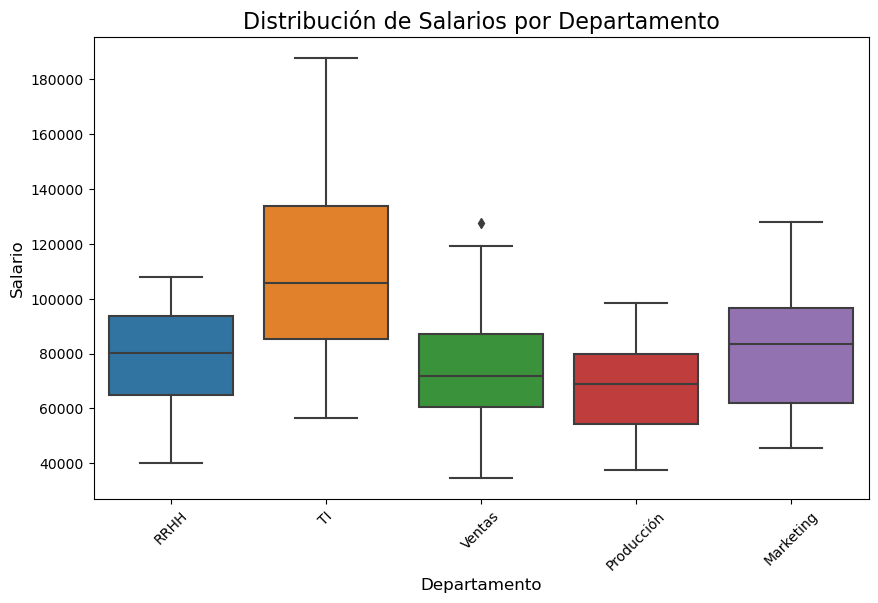

In [23]:
# Crear un boxplot para la distribución de salarios por departamento
plt.figure(figsize=(10, 6))
sns.boxplot(x='Departamento', y='Salario', data=df)

# Establecer título y etiquetas
plt.title('Distribución de Salarios por Departamento', fontsize=16)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Salario', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.show()

**Grading Criteria**  
- **Exploratory Analysis (3 points):** Appropriate use of visualizations and descriptive statistics.  
- **Multiple Regression (4 points):** Correct application of the model using only numerical variables, clear interpretation of coefficients, and model evaluation.  
- **ANOVA and Comparisons (3 points):** Proper use of ANOVA, interaction analysis, and effective visualization.  